<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/LAB02_Pr1_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

In [ ]:
# Importación de librerías a utilizar
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la base de datos
filename = 'BlackFriday.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.dtypes)
data.head(10)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [ ]:
# Rellenamos los valores na con 0, ya que no tiene categoría
data = data.fillna(0)

# Quitamos los duplicados
data = data.drop_duplicates()

In [ ]:
df_Product = data.groupby(['User_ID','Product_ID'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [ ]:
df_Gender = data.groupby(['User_ID','Gender'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [ ]:
df_Age = data.groupby(['User_ID','Age'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [ ]:
df_Occupation = data.groupby(['User_ID','Occupation'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Occupation = df_Occupation.set_axis(['0_O','1_O','2_O','3_O','4_O','5_O','6_O','7_O','8_O','9_O','10_O','11_O','12_O','13_O','14_O','15_O','16_O','17_O','18_O','19_O','20_O'], axis = 1, inplace = False)

In [ ]:
df_City = data.groupby(['User_ID','City_Category'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [ ]:
df_Stay = data.groupby(['User_ID','Stay_In_Current_City_Years'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Stay = df_Stay.set_axis(['0_S','1_S','2_S','3_S','4+_S'], axis = 1, inplace = False)

In [ ]:
df_Marital = data.groupby(['User_ID','Marital_Status'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Marital = df_Marital.set_axis(['0_M','1_M'], axis = 1, inplace = False)

In [ ]:
df_Product_Category_1 = data.groupby(['User_ID','Product_Category_1'])['Product_Category_2'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_1 = df_Product_Category_1.set_axis(['1_C1','2_C1','3_C1','4_C1','5_C1','6_C1','7_C1','8_C1','9_C1','10_C1','11_C1','12_C1','13_C1','14_C1','15_C1','16_C1','17_C1','18_C1'], axis = 1, inplace = False)

In [ ]:
df_Product_Category_2 = data.groupby(['User_ID','Product_Category_2'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_2 = df_Product_Category_2.set_axis(['0_C2','2_C2','3_C2','4_C2','5_C2','6_C2','7_C2','8_C2','9_C2','10_C2','11_C2','12_C2','13_C2','14_C2','15_C2','16_C2','17_C2','18_C2'], axis = 1, inplace = False)

In [ ]:
df_Product_Category_3 = data.groupby(['User_ID','Product_Category_3'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_3 = df_Product_Category_3.set_axis(['0_C3','3_C3','4_C3','5_C3','6_C3','8_C3','9_C3','10_C3','11_C3','12_C3','13_C3','14_C3','15_C3','16_C3','17_C3','18_C3'], axis = 1, inplace = False)

In [ ]:
df = pd.concat([df_Product, df_Occupation, df_City, df_Stay, df_Marital, df_Product_Category_1, df_Product_Category_2, df_Product_Category_3, df_Age, df_Gender], axis = 1)

In [ ]:
frq_items = apriori(df, min_support = 0.5, use_colnames = True)

# Eliminamos las reglas que no sirven
mask = (frq_items['itemsets'].apply(lambda x: '0_C2' in x) | frq_items['itemsets'].apply(lambda x: '0_C3' in x))
frq_items = frq_items.drop(frq_items[mask].index)

In [ ]:
# K = 1
print(frq_items[frq_items['itemsets'].apply(lambda x: len(x)) == 1])

     support itemsets
0   0.532847      (C)
1   0.580037    (0_M)
2   0.905958   (1_C1)
3   0.536581   (2_C1)
4   0.852996   (5_C1)
5   0.521643   (6_C1)
6   0.767951   (8_C1)
8   0.729588   (2_C2)
9   0.527075   (4_C2)
10  0.592938   (5_C2)
11  0.516890   (6_C2)
12  0.830929   (8_C2)
13  0.757936  (14_C2)
14  0.656765  (15_C2)
15  0.723986  (16_C2)
17  0.533865   (5_C3)
18  0.538618  (14_C3)
19  0.565099  (15_C3)
20  0.670175  (16_C3)
21  0.556782  (17_C3)
22  0.717196      (M)


In [ ]:
#K >= 2
i = 2
while i <= max(frq_items['itemsets'].apply(lambda x: len(x))):
  print(frq_items[frq_items['itemsets'].apply(lambda x: len(x)) == i])
  i = i + 1

      support        itemsets
24   0.527245     (0_M, 1_C1)
27   0.516551    (2_C1, 1_C1)
28   0.781531    (5_C1, 1_C1)
29   0.711254    (8_C1, 1_C1)
31   0.729588    (2_C2, 1_C1)
..        ...             ...
118  0.544559  (15_C2, 16_C3)
119  0.505177      (15_C2, M)
121  0.553217  (16_C3, 16_C2)
122  0.539127      (16_C2, M)
129  0.503650      (16_C3, M)

[65 rows x 2 columns]
      support              itemsets
134  0.647938    (8_C1, 5_C1, 1_C1)
136  0.644543    (5_C1, 2_C2, 1_C1)
137  0.526057    (5_C1, 5_C2, 1_C1)
138  0.705653    (8_C2, 5_C1, 1_C1)
139  0.657274   (14_C2, 5_C1, 1_C1)
..        ...                   ...
309  0.524868   (16_C2, 2_C2, 8_C2)
311  0.518418   (16_C3, 2_C2, 8_C2)
320  0.538109  (14_C2, 16_C2, 8_C2)
322  0.518927  (16_C3, 14_C2, 8_C2)
325  0.511119  (16_C3, 16_C2, 8_C2)

[74 rows x 2 columns]
      support                    itemsets
343  0.548973    (8_C1, 5_C1, 2_C2, 1_C1)
344  0.601935    (8_C1, 8_C2, 5_C1, 1_C1)
345  0.578849   (8_C1, 14_C2, 5_C1, 

In [ ]:
# Reglas de asociación independientemente de la confianza
rules = association_rules(frq_items, metric = 'confidence', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
1,(1_C1),(0_M),0.905958,0.580037,0.527245,0.581975,1.003340,0.001755,1.004635
2,(2_C1),(1_C1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
3,(1_C1),(2_C1),0.905958,0.536581,0.516551,0.570171,1.062599,0.030430,1.078146
4,(5_C1),(1_C1),0.852996,0.905958,0.781531,0.916219,1.011326,0.008752,1.122470
...,...,...,...,...,...,...,...,...,...
1265,(14_C2),"(5_C1, 16_C2, 1_C1, 8_C2)",0.757936,0.567306,0.503819,0.664726,1.171723,0.073838,1.290567
1266,(5_C1),"(14_C2, 16_C2, 1_C1, 8_C2)",0.852996,0.525378,0.503819,0.590647,1.124233,0.055674,1.159444
1267,(8_C2),"(14_C2, 5_C1, 16_C2, 1_C1)",0.830929,0.533186,0.503819,0.606333,1.137188,0.060780,1.185809
1268,(16_C2),"(14_C2, 5_C1, 1_C1, 8_C2)",0.723986,0.607707,0.503819,0.695897,1.145120,0.063848,1.290001


In [ ]:
# Reglas de asociación de alta confianza (confianza >= 0.9)
rules_AltaConf = association_rules(frq_items, metric ="confidence", min_threshold = 0.9)
rules_AltaConf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
1,(2_C1),(1_C1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
2,(5_C1),(1_C1),0.852996,0.905958,0.781531,0.916219,1.011326,0.008752,1.122470
3,(8_C1),(1_C1),0.767951,0.905958,0.711254,0.926172,1.022312,0.015523,1.273787
4,(2_C2),(1_C1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
...,...,...,...,...,...,...,...,...,...
251,"(14_C2, 5_C1, 16_C2, 8_C2)",(1_C1),0.516551,0.905958,0.503819,0.975353,1.076598,0.035846,3.815588
252,"(14_C2, 5_C1, 16_C2, 1_C1)",(8_C2),0.533186,0.830929,0.503819,0.944922,1.137188,0.060780,3.069673
253,"(14_C2, 16_C2, 1_C1, 8_C2)",(5_C1),0.525378,0.852996,0.503819,0.958966,1.124233,0.055674,3.582497
254,"(14_C2, 5_C1, 16_C2)","(1_C1, 8_C2)",0.551519,0.773892,0.503819,0.913512,1.180412,0.077003,2.614319


In [ ]:
# Dado un antecesor, devolver todas las reglas que contengan dicho antecesor
# Por ejemplo, vamos a ver las reglas donde el antecedente contiene la característica
# de que el usuario está casado

rules[rules['antecedents'].apply(lambda x: '0_M' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.00334,0.001755,1.03325


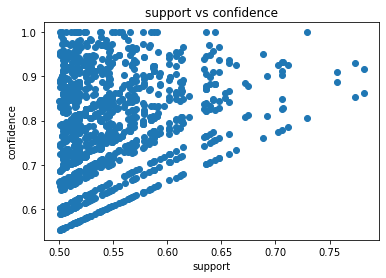

In [ ]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

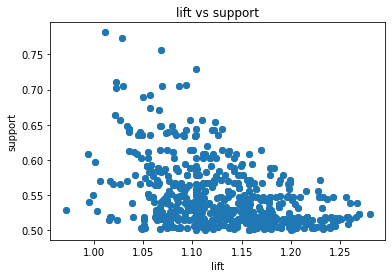

In [ ]:
plt.scatter(rules['lift'],rules['support'])
plt.xlabel('lift')
plt.ylabel('support')
plt.title('lift vs support')
plt.show()

# Preguntas
Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [ ]:
df = pd.concat([df_Age, df_Gender, df_Product_Category_1, df_Product_Category_2, df_Product_Category_3], axis = 1)
frq_items_all = apriori(df, min_support = 0.3, use_colnames = True)

# Eliminamos los soportes que no sirven
mask = (frq_items_all['itemsets'].apply(lambda x: '0_C2' in x) | frq_items_all['itemsets'].apply(lambda x: '0_C3' in x))
frq_items_all = frq_items_all.drop(frq_items_all[mask].index)

In [ ]:
frq_items_all_30 = frq_items_all[frq_items_all["support"].apply(lambda x: 0.30 <= x)]
frq_items_all_50 = frq_items_all[frq_items_all["support"].apply(lambda x: 0.50 <= x)]
frq_items_all_70 = frq_items_all[frq_items_all["support"].apply(lambda x: 0.70 <= x)]

¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos

Da lo mismo.

 ¿Qué   tipo   reglas   desaparecen   según   la   configuración   y   categorías   ( género,   edad   y   tipo   de   producto)
consideradas? ¿Por qué?

In [ ]:
rules_30 = association_rules(frq_items_all_30, metric = 'confidence', min_threshold=0.6)
rules_30

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(26-35),(1_C1),0.348498,0.905958,0.326600,0.937165,1.034446,0.010876,1.496649
1,(26-35),(5_C1),0.348498,0.852996,0.301307,0.864588,1.013590,0.004040,1.085608
2,(26-35),(8_C2),0.348498,0.830929,0.301477,0.865075,1.041095,0.011900,1.253082
3,(1_C1),(M),0.905958,0.717196,0.663724,0.732621,1.021508,0.013975,1.057692
4,(M),(1_C1),0.717196,0.905958,0.663724,0.925444,1.021508,0.013975,1.261354
...,...,...,...,...,...,...,...,...,...
377362,"(16_C3, 15_C3)","(8_C1, 14_C2, 8_C2, 15_C2, 2_C2, 16_C2, 1_C1)",0.466474,0.370056,0.304023,0.651747,1.761211,0.131401,1.808867
377363,"(14_C2, 15_C3)","(8_C1, 16_C3, 8_C2, 15_C2, 2_C2, 16_C2, 1_C1)",0.464777,0.375828,0.304023,0.654127,1.740498,0.129347,1.804630
377364,"(15_C3, 8_C2)","(8_C1, 16_C3, 14_C2, 15_C2, 2_C2, 16_C2, 1_C1)",0.501103,0.356646,0.304023,0.606707,1.701148,0.125307,1.635816
377365,"(15_C2, 15_C3)","(8_C1, 16_C3, 14_C2, 8_C2, 2_C2, 16_C2, 1_C1)",0.472925,0.383806,0.304023,0.642857,1.674954,0.122512,1.725344


In [ ]:
rules_50 = association_rules(frq_items_all_50, metric = 'confidence', min_threshold=0.6)
rules_50

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_C1),(M),0.905958,0.717196,0.663724,0.732621,1.021508,0.013975,1.057692
1,(M),(1_C1),0.717196,0.905958,0.663724,0.925444,1.021508,0.013975,1.261354
2,(5_C1),(M),0.852996,0.717196,0.608216,0.713035,0.994198,-0.003549,0.985500
3,(M),(5_C1),0.717196,0.852996,0.608216,0.848047,0.994198,-0.003549,0.967432
4,(8_C1),(M),0.767951,0.717196,0.550331,0.716622,0.999201,-0.000440,0.997977
...,...,...,...,...,...,...,...,...,...
1203,"(1_C1, 8_C2)","(14_C2, 5_C1, 16_C2)",0.773892,0.551519,0.503819,0.651020,1.180412,0.077003,1.285119
1204,"(16_C2, 1_C1)","(14_C2, 5_C1, 8_C2)",0.688678,0.642506,0.503819,0.731575,1.138628,0.061340,1.331823
1205,(14_C2),"(5_C1, 16_C2, 1_C1, 8_C2)",0.757936,0.567306,0.503819,0.664726,1.171723,0.073838,1.290567
1206,(8_C2),"(14_C2, 5_C1, 16_C2, 1_C1)",0.830929,0.533186,0.503819,0.606333,1.137188,0.060780,1.185809


In [ ]:
rules_70 = association_rules(frq_items_all_70, metric = 'confidence', min_threshold=0.6)
rules_70

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(5_C1),(1_C1),0.852996,0.905958,0.781531,0.916219,1.011326,0.008752,1.122470
1,(1_C1),(5_C1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
2,(8_C1),(1_C1),0.767951,0.905958,0.711254,0.926172,1.022312,0.015523,1.273787
3,(1_C1),(8_C1),0.905958,0.767951,0.711254,0.785085,1.022312,0.015523,1.079725
4,(2_C2),(1_C1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
5,(1_C1),(2_C2),0.905958,0.729588,0.729588,0.805321,1.103804,0.068612,1.389020
6,(8_C2),(1_C1),0.830929,0.905958,0.773892,0.931359,1.028037,0.021106,1.370043
7,(1_C1),(8_C2),0.905958,0.830929,0.773892,0.854225,1.028037,0.021106,1.159813
8,(14_C2),(1_C1),0.757936,0.905958,0.701918,0.926092,1.022224,0.015260,1.272413
9,(1_C1),(14_C2),0.905958,0.757936,0.701918,0.774780,1.022224,0.015260,1.074789


Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas   que   te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold. Justifica los resultados.

In [ ]:
rules_50_lift = association_rules(frq_items_all_50, metric = 'lift', min_threshold=1.2)
rules_50_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(15_C3),(2_C2),0.565099,0.729588,0.523171,0.925804,1.268941,0.110882,3.644547
1,(2_C2),(15_C3),0.729588,0.565099,0.523171,0.717078,1.268941,0.110882,1.537174
2,(15_C2),(16_C3),0.656765,0.670175,0.544559,0.829155,1.237222,0.104412,1.930550
3,(16_C3),(15_C2),0.670175,0.656765,0.544559,0.812563,1.237222,0.104412,1.831207
4,"(5_C2, 1_C1)",(2_C2),0.571550,0.729588,0.500594,0.875854,1.200478,0.083599,2.178179
...,...,...,...,...,...,...,...,...,...
143,"(14_C2, 8_C2)","(5_C1, 16_C2, 1_C1)",0.671533,0.611441,0.503819,0.750253,1.227024,0.093217,1.555808
144,"(14_C2, 16_C2)","(5_C1, 1_C1, 8_C2)",0.584281,0.705653,0.503819,0.862289,1.221974,0.091520,2.137433
145,"(14_C2, 1_C1)","(5_C1, 16_C2, 8_C2)",0.701918,0.587167,0.503819,0.717775,1.222438,0.091676,1.462781
146,"(5_C1, 16_C2)","(14_C2, 1_C1, 8_C2)",0.639620,0.635715,0.503819,0.787686,1.239054,0.097203,1.715780


In [ ]:
rules_50_support = association_rules(frq_items_all_50, metric = 'support', min_threshold=0.7)
rules_50_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(5_C1),(1_C1),0.852996,0.905958,0.781531,0.916219,1.011326,0.008752,1.122470
1,(1_C1),(5_C1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
2,(8_C1),(1_C1),0.767951,0.905958,0.711254,0.926172,1.022312,0.015523,1.273787
3,(1_C1),(8_C1),0.905958,0.767951,0.711254,0.785085,1.022312,0.015523,1.079725
4,(2_C2),(1_C1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
5,(1_C1),(2_C2),0.905958,0.729588,0.729588,0.805321,1.103804,0.068612,1.389020
6,(8_C2),(1_C1),0.830929,0.905958,0.773892,0.931359,1.028037,0.021106,1.370043
7,(1_C1),(8_C2),0.905958,0.830929,0.773892,0.854225,1.028037,0.021106,1.159813
8,(14_C2),(1_C1),0.757936,0.905958,0.701918,0.926092,1.022224,0.015260,1.272413
9,(1_C1),(14_C2),0.905958,0.757936,0.701918,0.774780,1.022224,0.015260,1.074789


Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos

In [ ]:
rules_30[rules_30['antecedents'].apply(lambda x: '26-35' in x)]

In [ ]:
rules_50[rules_50['antecedents'].apply(lambda x: 'M' in x)]

In [ ]:
rules_70[rules_70['antecedents'].apply(lambda x: '1_C1' in x)]